<a href="https://colab.research.google.com/github/MikeMNelhams/SkyBroadbandProject/blob/main/Copy_of_MDM3_Sky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
### Importing from GitHub and turning csv files into data frames ###
df_aug_18 = pd.read_csv("https://raw.githubusercontent.com/MikeMNelhams/SkyBroadbandProject/main/PerformanceData/Aug-18.csv")

# Making 4 copies rather than 4 imports (Faster and saves space)
df_sky76 = df_aug_18.copy()
df_sky38 = df_aug_18.copy()
df_sky17 = df_aug_18.copy()
df_sky8 = df_aug_18.copy()

### removing other broadband providers ###
### sky 76 ### 
filter = (df_sky76["Ofcom Product"]=="Sky 76")
df_sky76.where(filter, inplace = True) 
df_sky76.dropna(inplace = True)

### removing other broadband providers ###
### sky 38 ### 
filter = (df_sky38["Ofcom Product"]=="Sky 38")
df_sky38.where(filter, inplace = True) 
df_sky38.dropna(inplace = True)

### removing other broadband providers ###
### sky 17 ### 
filter = (df_sky17["Ofcom Product"]=="Sky 17")
df_sky17.where(filter, inplace = True) 
df_sky17.dropna(inplace = True)

### removing other broadband providers ###
### sky 38 ### 
filter = (df_sky8["Ofcom Product"]=="Sky 8")
df_sky8.where(filter, inplace = True) 
df_sky8.dropna(inplace = True)

In [4]:
### trial with just the sky 76 data ###
### seperating test and train data for Sky 76 ###
x_data = df_sky76[['24 hr average upload speed','24 hour time to load webpage', '24 hour Latency', 
                   '24 hour Jitter Downstream', '24 hour Jitter Upstream', 'Disconnections', 
                   '24 hour - Youtube Start-up delay', '24 hour - Netflix Start-up delay', 
                   '24 hour - iPlayer Start-up delay', '24 hour packet loss']]

x_data['24 hour packet loss'] = x_data['24 hour packet loss'].replace({'%':''}, regex=True)

x_train, x_test, y_train, y_test = train_test_split(x_data, df_sky76['24 hr average download speed'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
### Creating model using linear regression ###
lr = LinearRegression()
lr.fit(x_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

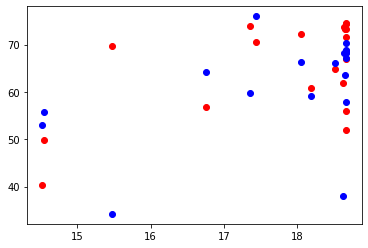

In [6]:
### using model to predict test data ###
### plotting against one x as to visualise model ###
prediction = lr.predict(x_test.values)
plt.scatter(x_test['24 hr average upload speed'], y_test, color='r')
plt.scatter(x_test['24 hr average upload speed'], prediction, color='b')

In [7]:
### scoring the model ###
lr.score(x_test.values, y_test.values)

-0.5636829598687847

In [8]:
### equating coefficients for each feature ###
### This tells us which feature is the best predictor of download speed ###
features = ['24 hr average upload speed','24 hour time to load webpage', '24 hour Latency', 
                   '24 hour Jitter Downstream', '24 hour Jitter Upstream', 'Disconnections', 
                   '24 hour - Youtube Start-up delay', '24 hour - Netflix Start-up delay', 
                   '24 hour - iPlayer Start-up delay', '24 hour packet loss']
for i in range(len(lr.coef_)):
  print(features[i] + ' has a coefficient of ' + str(lr.coef_[i]))

24 hr average upload speed has a coefficient of 1.8929951612704996
24 hour time to load webpage has a coefficient of -0.02971439979723321
24 hour Latency has a coefficient of 0.20820614635216989
24 hour Jitter Downstream has a coefficient of -7.744452422589836
24 hour Jitter Upstream has a coefficient of -16.48710336517823
Disconnections has a coefficient of -1.6627416944369553
24 hour - Youtube Start-up delay has a coefficient of -0.0019942626736426192
24 hour - Netflix Start-up delay has a coefficient of -0.003901183178709189
24 hour - iPlayer Start-up delay has a coefficient of -0.018852140017841863
24 hour packet loss has a coefficient of 13.257456820540106


In [9]:
### Doing linear regression for all sky data ###
### adding all versions of sky together ###
df_sky_all = pd.concat([df_sky76, df_sky38, df_sky17, df_sky8])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


The score for this linear regression model is 0.8651508489027204
24 hr average upload speed has a coefficient of 2.5676232338385145
24 hour time to load webpage has a coefficient of -0.005617144670590209
24 hour Latency has a coefficient of -0.015285699656628937
24 hour Jitter Downstream has a coefficient of 1.3900007485854005
24 hour Jitter Upstream has a coefficient of 0.6962731507562361
Disconnections has a coefficient of 0.047320751314153676
24 hour - Youtube Start-up delay has a coefficient of -0.0017758000722791385
24 hour - Netflix Start-up delay has a coefficient of -0.0023255181110501534
24 hour - iPlayer Start-up delay has a coefficient of -0.001037306030131981
24 hour packet loss has a coefficient of -1.5343284619254056


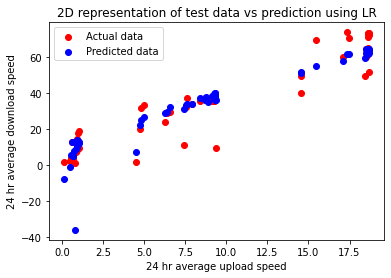

In [10]:
### completing linear regression for new df ###
### seperating test and train data for all sky broadbands ###
x_data = df_sky_all[['24 hr average upload speed','24 hour time to load webpage', '24 hour Latency', 
                   '24 hour Jitter Downstream', '24 hour Jitter Upstream', 'Disconnections', 
                   '24 hour - Youtube Start-up delay', '24 hour - Netflix Start-up delay', 
                   '24 hour - iPlayer Start-up delay', '24 hour packet loss']]
x_data['24 hour packet loss'] = x_data['24 hour packet loss'].replace({'%':''}, regex=True)
x_train, x_test, y_train, y_test = train_test_split(x_data, df_sky_all['24 hr average download speed'])

### Creating model using linear regression ###
lr = LinearRegression()
lr.fit(x_train.values, y_train.values)

### using model to predict test data ###
### plotting against one x as to visualise model ###
prediction = lr.predict(x_test.values)
plt.scatter(x_test['24 hr average upload speed'], y_test, color='r', label='Actual data')
plt.scatter(x_test['24 hr average upload speed'], prediction, color='b', label='Predicted data')
plt.xlabel('24 hr average upload speed')
plt.ylabel('24 hr average download speed')
plt.title('2D representation of test data vs prediction using LR')
plt.legend()

### scoring the model ###
print('The score for this linear regression model is ' +str(lr.score(x_test.values, y_test.values)))

### equating coefficients for each feature ###
### This tells us which feature is the best predictor of download speed ###
features = ['24 hr average upload speed','24 hour time to load webpage', '24 hour Latency', 
                   '24 hour Jitter Downstream', '24 hour Jitter Upstream', 'Disconnections', 
                   '24 hour - Youtube Start-up delay', '24 hour - Netflix Start-up delay', 
                   '24 hour - iPlayer Start-up delay', '24 hour packet loss']
for i in range(len(lr.coef_)):
  print(features[i] + ' has a coefficient of ' + str(lr.coef_[i]))